In [49]:
%pylab  
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings("ignore")


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [50]:
 class TelcoChurn:
        
    """
    Prints summary statistics of columns, train and predict the model
    """
    
    churn_df = None
    churn_df_numeric = None
    churn_df_nonnumeric=None
    
    numerics= None
    col_names=None
    
    churn_cleaned = None
    churn_numeric=None #cleaned
    churn_non_numeric = None # cleaned
    
    
    def __init__(self):
        
        ###Load data 
        
        self.churn_df = pd.read_excel('/Users/rameshthulasiram/Documents/yams-python_ucsc/final project/Telco_customer_churn_dataset.xlsx', 'sheet1')
    
        self.numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        self.churn_df_numeric = self.churn_df.select_dtypes(include=self.numerics)
        #Return a subset of a DataFrame including/excluding columns based on their dtype.
        self.churn_df_nonnumeric = self.churn_df.select_dtypes(exclude=self.numerics)
        
    def dataset_initial_understanding(self):
        # Understaning the data set given 
        
        print "Column names:"
        self.col_names= self.churn_df.columns.tolist()
        print self.col_names
        print "\nSample data:"
        print self.churn_df.head(6)   
        print str(self.churn_df)
        print self.churn_df.dtypes
    
    def preprocess_data(self):
        # Cleaning data so that it doesnt have any NA values. 
        
        self.churn_df['TotalCharges'] = self.churn_df['TotalCharges'].map(lambda x: '' if (type(x) != type(1) and type(x) != type(0.5)) else x)
        self.remove_rows = self.churn_df[self.churn_df['TotalCharges'] == '']
        #remove_rows
        self.churn_cleaned = self.churn_df[self.churn_df['TotalCharges'] != '']
        #churn_cleaned
        self.churn_cleaned['TotalCharges'] = self.churn_cleaned['TotalCharges'].astype('float64')
        self.churn_numeric = self.churn_cleaned.select_dtypes(include=self.numerics)
        #churn_df_numeric
        self.churn_non_numeric= self.churn_cleaned.select_dtypes(exclude=self.numerics)
        print self.churn_cleaned.columns.tolist()
        

        
    def summary_statistics(self):
        # Descriptive statistics
        
        for column_name in self.churn_cleaned:
            print column_name
            description = self.churn_cleaned[column_name].describe()
            if 'unique' in description and description['unique'] <= 10:
                description['unique_values'] = unique(self.churn_cleaned[column_name].get_values())
                description['value_counts'] = self.churn_cleaned[column_name].value_counts().to_dict()
            print description
                
               
       
    
    def histogram(self):
        """
        Histogram for a numerical column, default 100 bins
        
        """
        
        for column_name in self.churn_numeric:
            figure(figsize=(12, 9))
            ax = subplot(111)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()
            xticks(fontsize=14)
            yticks(range(5000, 30001, 5000), fontsize=14)
            xlabel(column_name, fontsize=16)
            ylabel("Count", fontsize=16)

            hist(list(self.churn_cleaned[column_name].values),color="#3F5D7D")


    def bar_chart(self):
        """ the bar chart- to plot categorical variables"""
    
        for column_name in self.churn_non_numeric:
            bar_dict = self.churn_non_numeric[column_name].value_counts().to_dict()
            figure()
            ax = subplot(111)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()
            #xticks(fontsize=14)
            yticks(range(5000, 30001, 5000), fontsize=14)
            xlabel(column_name, fontsize=16)
            ylabel("Count", fontsize=16)
            width = 0.35
            bar(arange(len(bar_dict.keys())), bar_dict.values(), width,  color="#3F5D7D")
            xticks(arange(len(bar_dict.keys()))+width/2., bar_dict.keys() )

       
    
    def train_and_predict(self):
        drop_columns = ['customerID']
        categoricals = ["gender","SeniorCitizen", "Partner", "Dependents","PhoneService", "MultipleLines", "InternetService",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling","PaymentMethod"]
        
### Data cleansing
        for cat in categoricals:
            self.churn_cleaned[cat] = self.churn_cleaned[cat].astype('category')
            
# Split test & training data as 1:3
        #Draw samples from a uniform distribution.
        self.churn_cleaned['is_train'] = np.random.uniform(0, 1, len(self.churn_cleaned)) <= .75
        self.train,self.test = self.churn_cleaned[self.churn_cleaned['is_train']==True], self.churn_cleaned[self.churn_cleaned['is_train']==False]

# Convert Churn to a format that we can use to train
        labels_train = (self.churn_cleaned[self.churn_cleaned['is_train']==True])[['Churn']]
        print labels_train,type(labels_train)
        labels_test = (self.churn_cleaned[self.churn_cleaned['is_train']==False])[['Churn']]
        print labels_test,type(labels_test)
        #Encode labels with value between 0 and n_classes-1.
        le = preprocessing.LabelEncoder()
        #This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators.
        dv = DictVectorizer(sparse=False)
        #Fit label encoder and return encoded labels
        labels_train = le.fit_transform(labels_train)
        print labels_train,type(labels_train)
        labels_test = le.transform(labels_test)
        print labels_test,type(labels_test)


 # Keep only categorical data here
        #Return new object with labels in requested axis removed.
        categorical_view = self.churn_cleaned.drop(list( (set(self.churn_cleaned.columns) - set(categoricals)) ) , axis=1)
        #print categorical_view
        del self.churn_cleaned['Churn']
        
# Generate categorical training & test data
        categorical_train_as_dicts = [dict(r.iteritems()) for _, r in categorical_view[self.churn_cleaned['is_train']==True].iterrows()]
        #print categorical_train_as_dicts
        categorical_train_fea = dv.fit_transform(categorical_train_as_dicts)
        #print categorical_train_fea
        categorical_test_as_dicts = [dict(r.iteritems()) for _, r in categorical_view[self.churn_cleaned['is_train']==False].iterrows()]
        #print categorical_test_as_dicts
        categorical_test_fea = dv.transform(categorical_test_as_dicts)
        #print categorical_test_fea

 # Generate numerical training & test data
        numerical_train = self.churn_cleaned[self.churn_cleaned['is_train']==True].drop(list( set(drop_columns) | set(categoricals) | set(['is_train'])), axis=1)
        numerical_train_fea = numerical_train.as_matrix()
        numerical_test = self.churn_cleaned[self.churn_cleaned['is_train']==False].drop(list( set(drop_columns) | set(categoricals) | set(['is_train'])), axis=1)
        #print numerical_test
        numerical_test_fea = numerical_test.as_matrix()
        #print numerical_test_fea
        train_fea = np.concatenate( (categorical_train_fea, numerical_train_fea), axis=1)
        #Join a sequence of arrays along an existing axis.
        test_fea = np.concatenate( (categorical_test_fea, numerical_test_fea), axis=1)

# Use a random forest classifier
        clf = RandomForestClassifier(n_jobs=10)
        clf.fit(train_fea, labels_train)
        
# Predict now for test data
        label_predictions = le.inverse_transform(clf.predict(test_fea).astype('I'))

    
# model predictions
        print "Predictions"
        print label_predictions
        print "Original Test set labels"
        print le.inverse_transform(labels_test)
        orig = le.inverse_transform(labels_test).flatten()
        pred = label_predictions
        counted = (pred==orig)
        print sum(counted==True)

        print sum(counted==False)
        
        
         # Misclassification rate
        print "Misclassification rate"
        print sum(counted==False)/ (sum(counted==True) + sum(counted==False))
        
        #Model Accuracy
        print "Model Accuracy"
        
        print sum(counted==True)/(sum(counted==True) + sum(counted==False))
        


       

        #confusion matrix
        
        print "Confusion Matrix"
        label =["Yes", "No"]
        print label
        cm = confusion_matrix( orig, pred, label)
        print(cm)
        
        
tc= TelcoChurn()

'''
tc.dataset_initial_understanding()
tc.preprocess_data()
tc.summary_statistics()
tc.histogram()
tc.bar_chart()
tc.train_and_predict()



'''

        


'\ntc.dataset_initial_understanding()\ntc.preprocess_data()\ntc.summary_statistics()\ntc.histogram()\ntc.bar_chart()\ntc.train_and_predict()\n\n\n\n'

In [51]:
tc.dataset_initial_understanding()

Column names:
[u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', u'PhoneService', u'MultipleLines', u'InternetService', u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport', u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling', u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn']

Sample data:
   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   
5  9305-CDSKC  Female            No      No         No       8          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection

In [52]:


tc.preprocess_data()


[u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure', u'PhoneService', u'MultipleLines', u'InternetService', u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport', u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling', u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn']


In [53]:

tc.summary_statistics()

customerID
count           7032
unique          7032
top       5199-FPUSP
freq               1
Name: customerID, dtype: object
gender
count                                        7032
unique                                          2
top                                          Male
freq                                         3549
unique_values                      [Female, Male]
value_counts     {u'Male': 3549, u'Female': 3483}
Name: gender, dtype: object
SeniorCitizen
count                                   7032
unique                                     2
top                                       No
freq                                    5890
unique_values                      [No, Yes]
value_counts     {u'Yes': 1142, u'No': 5890}
Name: SeniorCitizen, dtype: object
Partner
count                                   7032
unique                                     2
top                                       No
freq                                    3639
unique_values                  

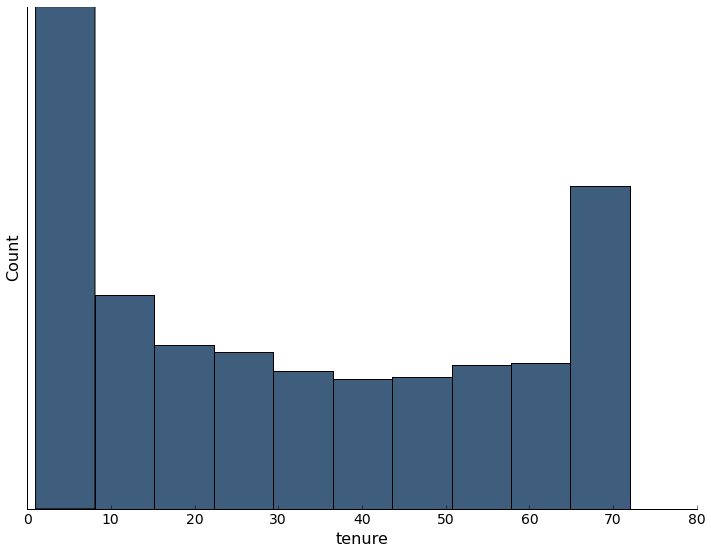

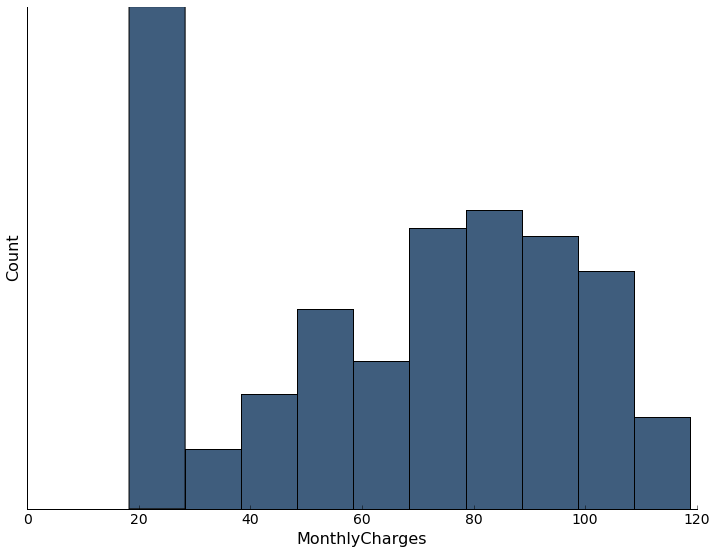

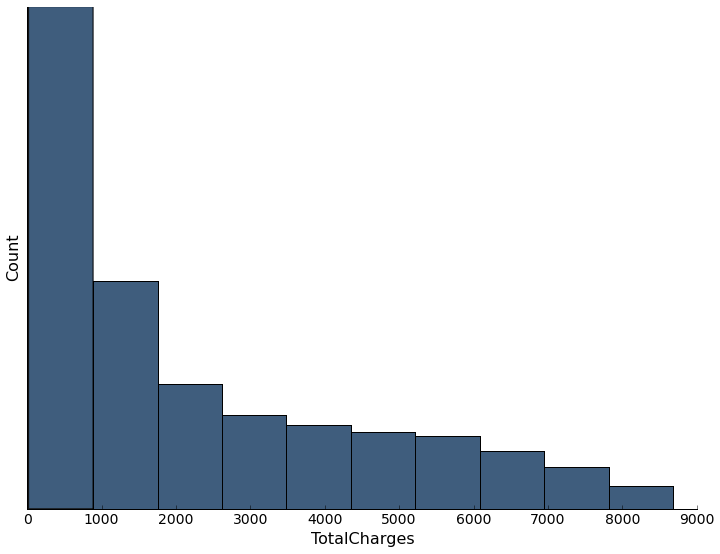

In [54]:
tc.histogram()

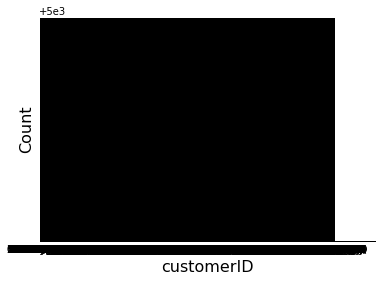

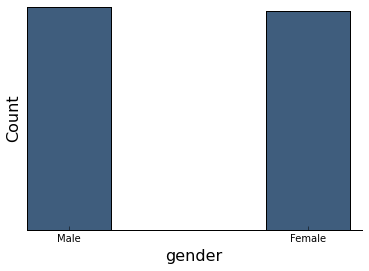

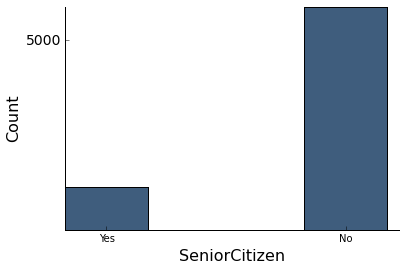

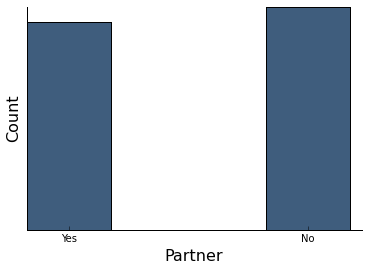

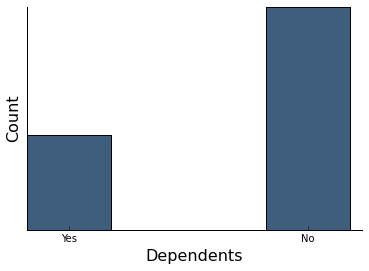

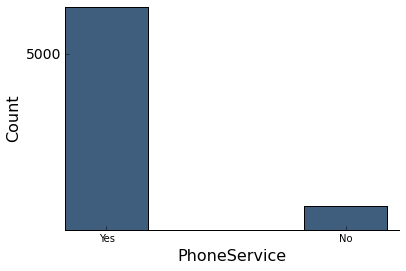

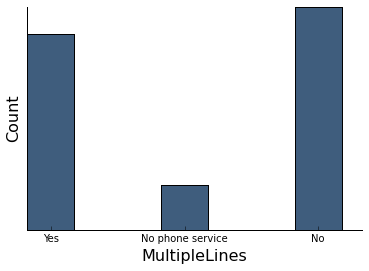

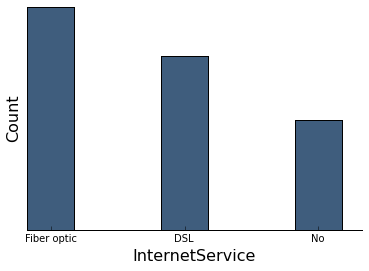

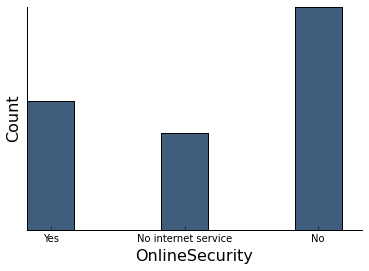

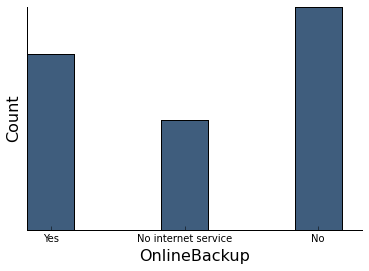

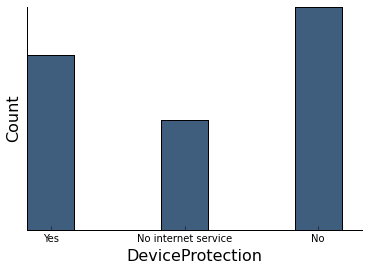

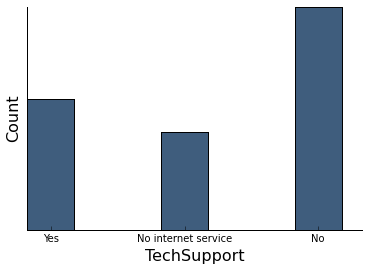

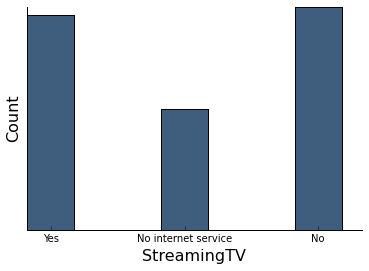

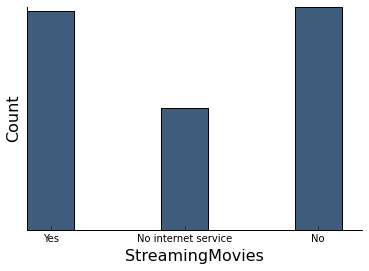

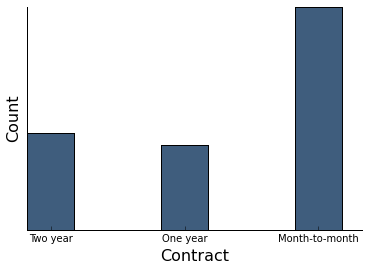

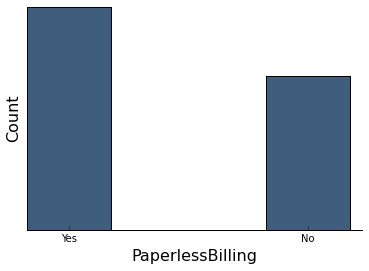

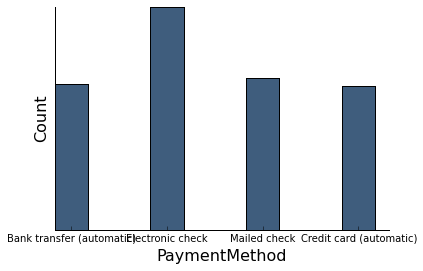

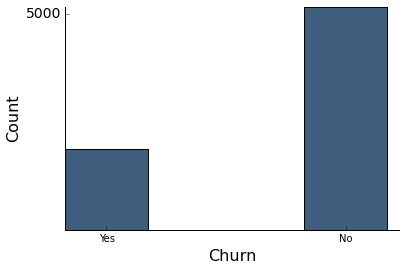

In [56]:
tc.bar_chart()

In [57]:
tc.train_and_predict()

     Churn
1       No
5      Yes
6       No
7       No
8      Yes
9       No
10      No
11      No
12      No
13     Yes
14      No
15      No
16      No
18     Yes
19      No
20     Yes
22     Yes
24      No
25      No
26     Yes
27     Yes
28      No
29     Yes
30      No
32      No
33      No
34      No
36     Yes
37      No
39     Yes
...    ...
7005    No
7006   Yes
7007    No
7008   Yes
7009   Yes
7010   Yes
7011   Yes
7012    No
7015    No
7016    No
7017    No
7018   Yes
7019    No
7020    No
7021   Yes
7022    No
7024    No
7025    No
7026   Yes
7027    No
7028    No
7029    No
7030    No
7031    No
7032   Yes
7036    No
7037    No
7038    No
7039    No
7042    No

[5252 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>
     Churn
0       No
2      Yes
3       No
4      Yes
17      No
21      No
23      No
31      No
35      No
38     Yes
42      No
50      No
56      No
57      No
60      No
68      No
70      No
90      No
95     Yes
96      No
102     No
108     No
12